In [1]:
import numpy as np
import pandas as pd
import hist

import matplotlib.pyplot as plt

## Number of days with positive temperature per year.

Let's read in the data with pandas. Some years have a extremely negative temperatures which are definitely not physically realistic, so we exclude those data points. 

In [105]:
df = pd.read_csv('stockholm_daily_mean_temperature.csv')

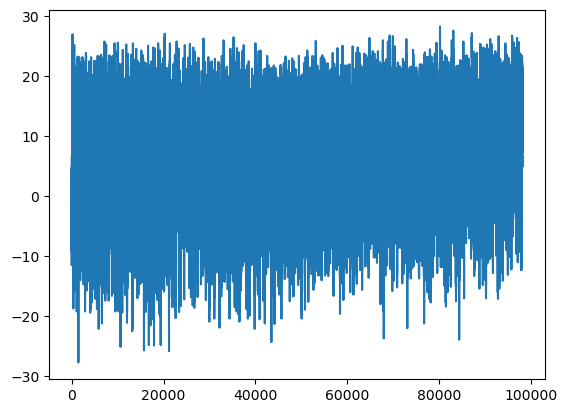

In [106]:
fig, ax = plt.subplots()

ax.plot(df['raw'][df['raw'] > -200])

Pandas is nice because we can tell it that our date column should be treated as a date, so we will have access to convenient methods.

In [108]:
df.set_index('date')

,raw,homo,adjust,site
date,,,,
1756-01-01,-8.7,-8.7,-8.7,1
1756-01-02,-9.2,-9.2,-9.2,1
1756-01-03,-8.6,-8.6,-8.6,1
1756-01-04,-7.7,-7.7,-7.7,1
1756-01-05,-7.2,-7.2,-7.2,1
...,...,...,...,...
2024-10-12,8.3,8.1,8.1,3
2024-10-13,10.3,10.1,10.1,3
2024-10-14,9.5,9.3,9.3,3


In [109]:
df['is_positive'] = df['raw'] > 0

In [111]:
df['date'] = pd.to_datetime(df['date'])

In [112]:
df.groupby(df['date'].dt.year)['homo'].mean()

date
1756    4.904918
1757    5.927671
1758    4.751781
1759    6.330411
1760    5.263661
          ...   
2020    8.985519
2021    7.376986
2022    8.048767
2023    7.247123
2024    9.158276
Name: homo, Length: 269, dtype: float64

In [113]:
filtered_df = df[df['raw'] > 0]

In [114]:
filtered_df['is_positive']

6        True
7        True
8        True
9        True
10       True
         ... 
98170    True
98171    True
98172    True
98173    True
98174    True
Name: is_positive, Length: 74460, dtype: bool

In [115]:
negative_temps_df = df[df['raw'] < 0]

In [116]:
zero_temps_df = df[df['raw'] == 0]

In [117]:
years = np.array(list(set(df['date'].dt.year)))

In [118]:
pos_temps_hist = hist.Hist(hist.axis.Regular(len(years), years[0]-0.5, years[-1]+0.5))
neg_temps_hist = hist.Hist(hist.axis.Regular(len(years), years[0]-0.5, years[-1]+0.5))
zero_temps_hist = hist.Hist(hist.axis.Regular(len(years), years[0]-0.5, years[-1]+0.5))

In [98]:
pos_temps_hist.fill(filtered_df['date'].dt.year)

Hist(Regular(269, 1755.5, 2024.5, label='Axis 0'), storage=Double()) # Sum: 74460.0

In [99]:
neg_temps_hist.fill(negative_temps_df['date'].dt.year)

Hist(Regular(269, 1755.5, 2024.5, label='Axis 0'), storage=Double()) # Sum: 23260.0

In [100]:
zero_temps_hist.fill(zero_temps_df['date'].dt.year)

Hist(Regular(269, 1755.5, 2024.5, label='Axis 0'), storage=Double()) # Sum: 455.0

In [101]:
all_temps_hist = pos_temps_hist + neg_temps_hist + zero_temps_hist

Text(0, 0.5, 'Num. days with postive temperature')

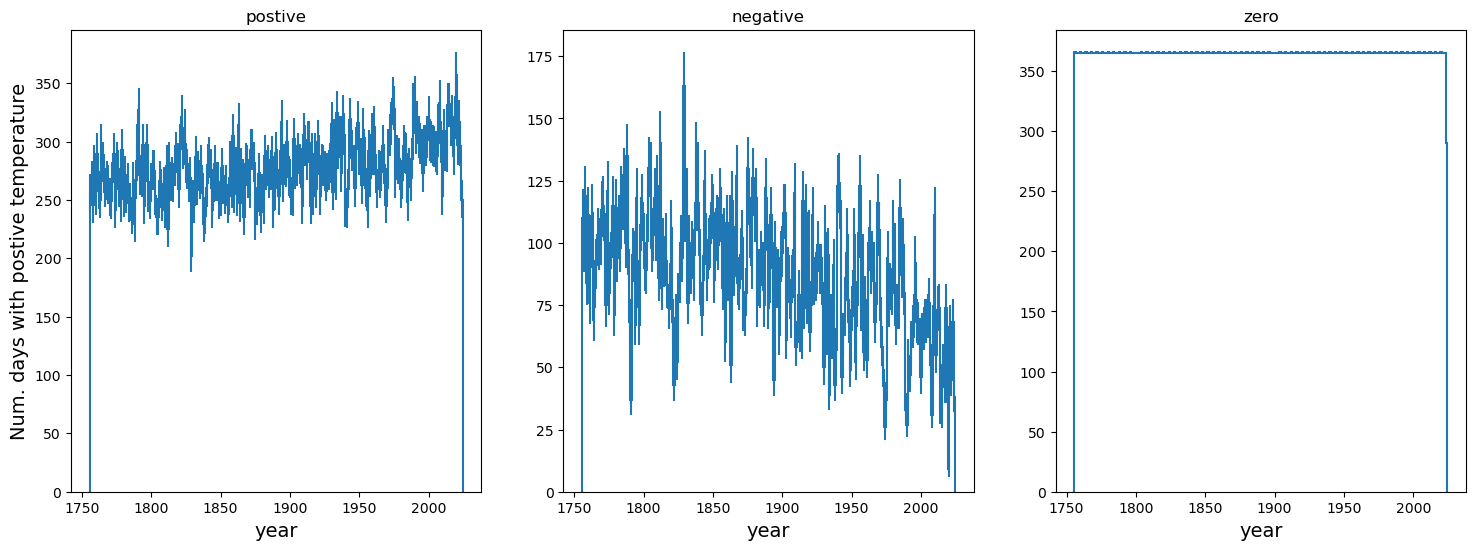

In [104]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
pos_temps_hist.plot1d(ax=axs[0])
neg_temps_hist.plot1d(ax=axs[1])
all_temps_hist.plot1d(ax=axs[2])

axs[0].set_xlabel('year', fontsize=14)
axs[1].set_xlabel('year', fontsize=14)
axs[2].set_xlabel('year', fontsize=14)

axs[0].set_title('postive')
axs[1].set_title('negative')
axs[2].set_title('zero')

axs[0].set_ylabel('Num. days with postive temperature', fontsize=14)

Notice all years have 365 days accounted for, and 366 for leap years. 

In [103]:
all_temps_hist.counts()

array([366., 365., 365., 365., 366., 365., 365., 365., 366., 365., 365.,
       365., 366., 365., 365., 365., 366., 365., 365., 365., 366., 365.,
       365., 365., 366., 365., 365., 365., 366., 365., 365., 365., 366.,
       365., 365., 365., 366., 365., 365., 365., 366., 365., 365., 365.,
       365., 365., 365., 365., 366., 365., 365., 365., 366., 365., 365.,
       365., 366., 365., 365., 365., 366., 365., 365., 365., 366., 365.,
       365., 365., 366., 365., 365., 365., 366., 365., 365., 365., 366.,
       365., 365., 365., 366., 365., 365., 365., 366., 365., 365., 365.,
       366., 365., 365., 365., 366., 365., 365., 365., 366., 365., 365.,
       365., 366., 365., 365., 365., 366., 365., 365., 365., 366., 365.,
       365., 365., 366., 365., 365., 365., 366., 365., 365., 365., 366.,
       365., 365., 365., 366., 365., 365., 365., 366., 365., 365., 365.,
       366., 365., 365., 365., 366., 365., 365., 365., 366., 365., 365.,
       365., 365., 365., 365., 365., 366., 365., 36

## Rolling Average

I think a rolling average makes more sense here because we want to capture larger scale trends within time series data that fluctuates a lot. Here I try that for multiple sizes of window.

In [206]:
df = pd.read_csv('stockholm_daily_mean_temperature.csv')
df.set_index('date')
df['date'] = pd.to_datetime(df['date'])

df = df[df['raw'] > -200]

In [205]:
df['rolling average'] = df['raw'].rolling(window=10000).mean()
df.dropna()['rolling average']

10006    5.87195
10007    5.87440
10008    5.87693
10009    5.87957
10010    5.88169
          ...   
98170    8.24741
98171    8.24744
98172    8.24759
98173    8.24725
98174    8.24687
Name: rolling average, Length: 88169, dtype: float64

For the largest window size, we see an upward trend by about 1.5 degrees. This could be real, but I'd be surprised if getting the upwards trend in temperature from the data was this easy. 

Text(0.5, 1.0, 'Rolling average')

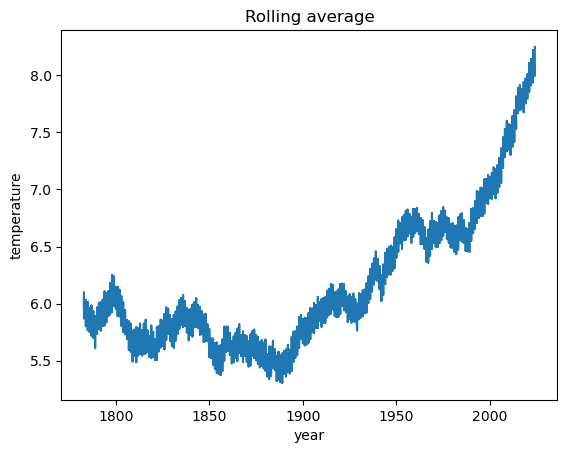

In [193]:
fig, ax = plt.subplots()

ax.plot(df.dropna()['date'].dt.year, df.dropna()['rolling average'])

ax.set_xlabel('year')
ax.set_ylabel('temperature')
ax.set_title('Rolling average')

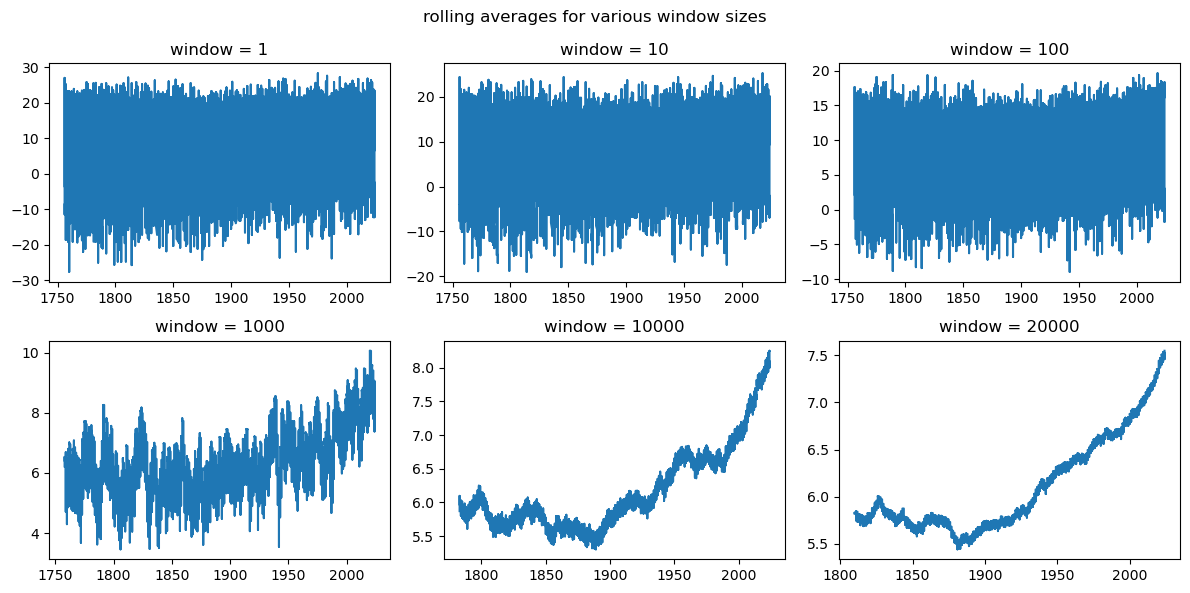

In [203]:
fig, axs = plt.subplots(2, 3, figsize=(12, 6))
windows = [1, 10, 100, 1000, 10000, 20000]

for window, ax in zip(windows, axs.ravel()):
    df = pd.read_csv('stockholm_daily_mean_temperature.csv')
    df.set_index('date')
    df['date'] = pd.to_datetime(df['date'])

    df = df[df['raw'] > -200]
    
    df['rolling average'] = df['raw'].rolling(window=window).mean()
    
    ax.plot(df.dropna()['date'].dt.year, df.dropna()['rolling average'])
    
    ax.set_title(f'window = {window}')
    
fig.suptitle('rolling averages for various window sizes')
fig.tight_layout()